1. Consider the hepatitis/ pima-indians-diabetes csv file, perform the following date pre-processing.
1. Load data in Pandas.
2. Drop columns that aren’t useful.
3. Drop rows with missing values.
4. Create dummy variables.
5. Take care of missing data.
6. Convert the data frame to NumPy.
7. Divide the data set into training data and test data.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [91]:
data=pd.read_csv("hepatitis_csv.csv")
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


In [92]:
columns_to_drop = ['steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big',
                   'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices',
                   'bilirubin', 'alk_phosphate', 'sgot', 'protime', 'histology']  
data = data.drop(columns=columns_to_drop)

In [93]:
data = data.dropna()
data

,age,sex,albumin,class
0,30,male,4.0,live
1,50,female,3.5,live
2,78,female,4.0,live
3,31,female,4.0,live
4,34,female,4.0,live
5,34,female,4.0,live
8,39,female,4.4,live
9,30,female,3.9,live
10,39,female,4.4,live
11,32,female,3.7,live


In [94]:
data = pd.get_dummies(data, columns=['sex'], drop_first=True)

In [95]:
data_array = data.values
X = data_array[:, 1:]  
y = data_array[:, 0] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Consider the hepatitis/ diabetes csv file, create the regression model display the co-efficients (B0-intercept
and B1-Slope), RMSE and predict the response. Plot the graph x v/s y in yellow and x v/s prediction in green.

In [96]:
original_data = pd.read_csv('diabetes_csv.csv')

selected_columns = ['Glucose', 'Outcome']
new_data = original_data[selected_columns]
new_data.to_csv('diabetes.csv', index=False)

In [97]:
data = pd.read_csv('diabetes.csv')
X = data[['Glucose']]  
y = data['Outcome'] 
data

,Glucose,Outcome
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1
5,116,0
6,78,1
7,115,0
8,197,1
9,125,1


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
intercept = model.intercept_
slope = model.coef_[0]
print("Intercept (B0):", intercept)
print("Slope (B1):", slope)

Intercept (B0): -0.47281007618874044
Slope (B1): 0.006782634415199604


In [101]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.4136790214589731


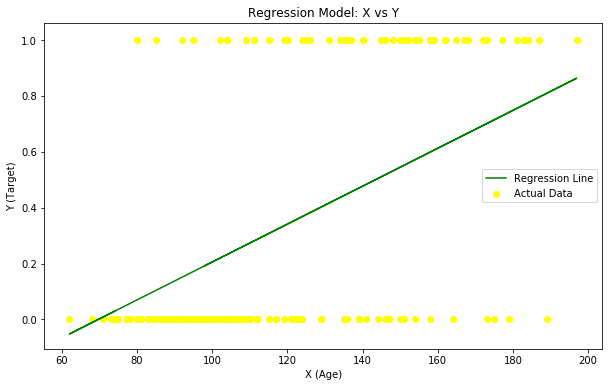

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='yellow', label='Actual Data')
plt.plot(X_test, y_pred, color='green', label='Regression Line')
plt.title('Regression Model: X vs Y')
plt.xlabel('X (Age)')
plt.ylabel('Y (Target)')
plt.legend()
plt.show()

 Construct a training data of CSV file with attributes(Study-time in hours of ML lab course (x), Score out of
10 (y)) of 10 rows. Create the regression model display the co-efficients (B0-intercept and B1-Slope),
RMSE and predict the response. Plot the graph x v/s y in red and x v/s prediction in blu

In [103]:
data = {
    'Study-time in hours of ML lab course (x)': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Score out of 10 (y)': [4, 5, 5.5, 6, 7, 7.5, 8, 8.5, 9, 9.5] 
}
df = pd.DataFrame(data)
X = df[['Study-time in hours of ML lab course (x)']]
y = df['Score out of 10 (y)']

In [104]:
intercept = model.intercept_
slope = model.coef_[0]

print("Intercept (B0):", intercept)
print("Slope (B1):", slope)

Intercept (B0): -0.47281007618874044
Slope (B1): 0.006782634415199604


In [105]:
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 7.623592077112318


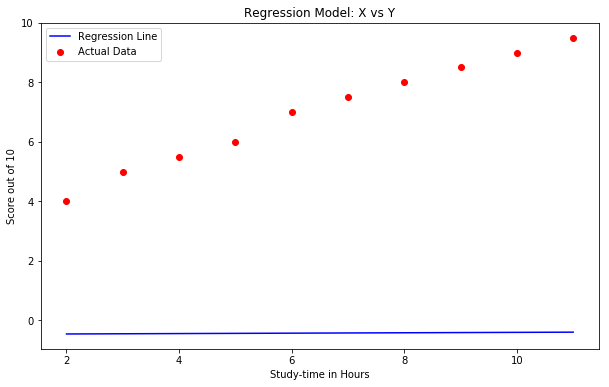

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, y_pred, color='blue', label='Regression Line')
plt.title('Regression Model: X vs Y')
plt.xlabel('Study-time in Hours')
plt.ylabel('Score out of 10')
plt.legend()
plt.show()